In [1]:
from time import sleep

In [ ]:
from dask import delayed
import nltk
nltk.download('stopwords')

In [8]:
# nltk.download('stopwords')
stop_words = nltk.corpus.stopwords.words('spanish')

In [9]:
def remove_stopwords(words):
    sleep(2)
    filtered = filter(lambda word: word not in stop_words, words)
    return list(filtered)

In [10]:
def add(t1, t2, t3, t4):
    sleep(1)
    return t1 + t2 + t3 + t4

In [12]:
%%time
test_text1 = remove_stopwords(['Estamos', 'todos', 'muy', 'bien'])
test_text2 = remove_stopwords(['Somos', 'los', 'últimos'])
test_text3 = remove_stopwords(['Se', 'podría', 'esperar', 'más'])
test_text4 = remove_stopwords(['La', 'última', 'oración'])
print(add(test_text1, test_text2, test_text3, test_text4))

['Estamos', 'bien', 'Somos', 'últimos', 'Se', 'podría', 'esperar', 'La', 'última', 'oración']
CPU times: user 32.5 ms, sys: 8.08 ms, total: 40.6 ms
Wall time: 9.01 s


In [25]:
%%time
test_text1 = delayed(remove_stopwords)(['Estamos', 'todos', 'muy', 'bien'])
test_text2 = delayed(remove_stopwords)(['Somos', 'los', 'últimos'])
test_text3 = delayed(remove_stopwords)(['Se', 'podría', 'esperar', 'más'])
test_text4 = delayed(remove_stopwords)(['La', 'última', 'oración'])
total = delayed(add)(test_text1, test_text2, test_text3, test_text4)


CPU times: user 1.04 ms, sys: 1.06 ms, total: 2.1 ms
Wall time: 2.12 ms


In [22]:
from dask.base import compute

In [26]:
%time total.compute()

CPU times: user 31.2 ms, sys: 1.84 ms, total: 33.1 ms
Wall time: 5.01 s


['Estamos',
 'bien',
 'Somos',
 'últimos',
 'Se',
 'podría',
 'esperar',
 'La',
 'última',
 'oración']

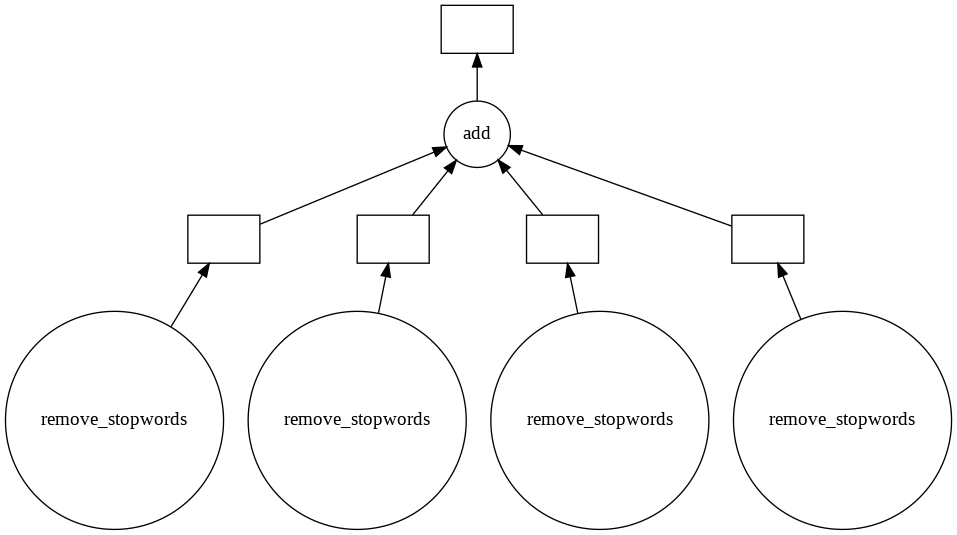

In [24]:
total.visualize()